# Graph Search Assignment

Note: This notebook assumes you understand how to use the graph library networkx. If you do not, please visit the "networkx_tutorial.ipynb" notebook.


## Introduction

This notebook will help you test and explore the different graph search algorithms from the course. The algorithms you will implement are:

1. Breadth-First Search
2. Depth-First Search
3. Dijkstra's Algorithm (Uniform Cost Search)
4. A* Search

To help you test, there are a few graphs you can use, though I encourage you to create your own after learning from premade_graphs.py. The first one is the Manhattan graph from the test notebook:

In [20]:
import premade_graphs
import utils
try:
    import answers as student_algos
except ImportError:
    import student_algos

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


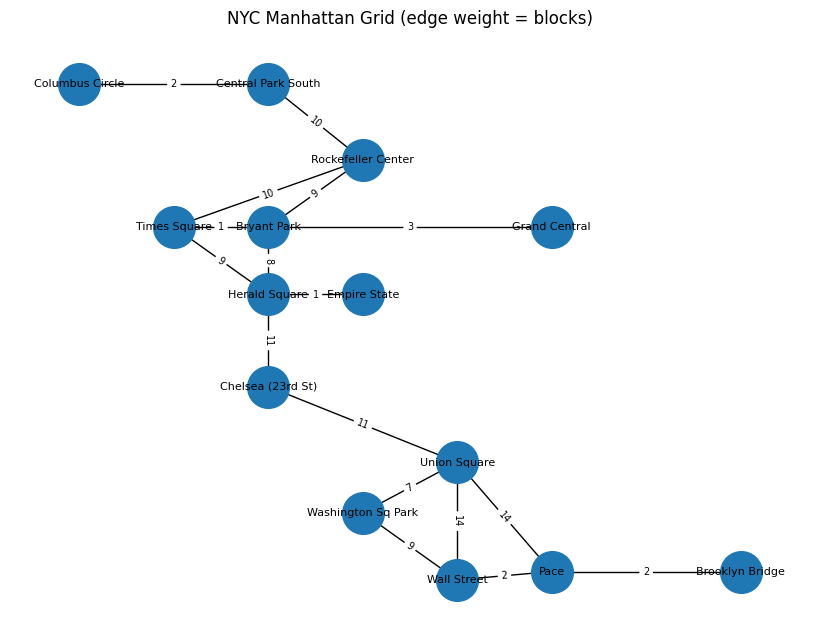

In [2]:
manhattan_graph = premade_graphs.basic_manhattan()
utils.draw_manhattan_graph(manhattan_graph, title="NYC Manhattan Grid (edge weight = blocks)")

Once you have a path, you can pass that in to visualize it as well. Start will be green, end is purple.

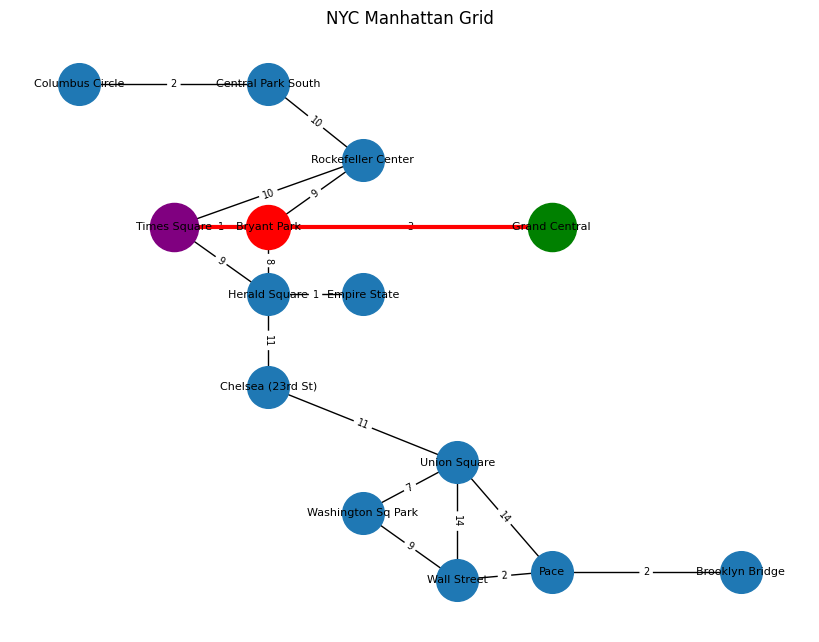

In [3]:
utils.draw_manhattan_graph(
    manhattan_graph,
    title="NYC Manhattan Grid",
    path=["Grand Central", "Bryant Park", "Times Square"]
)

Another graph you can use is the Grid world; pass certain parameters into it in order to generate new graphs. Create obstacles to see how your algorithms. Use this to test your A* algorithm with a manahttan distance heuristic.

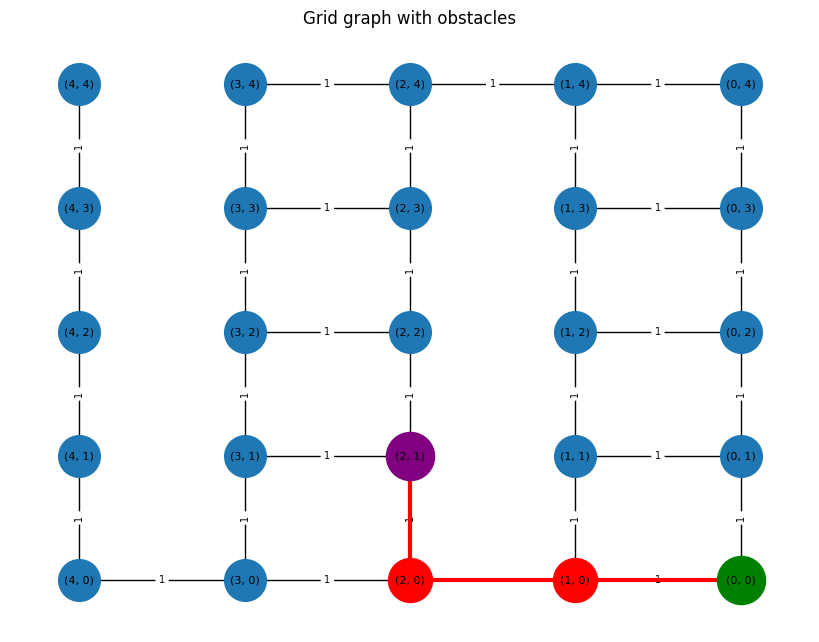

In [4]:
obstacles = [
    # Wall 1: Block move from x=1 to x=2 (Open at y=4)
    ((1, 0), (2, 0)),
    ((1, 1), (2, 1)),
    ((1, 2), (2, 2)),
    ((1, 3), (2, 3)),

    # Wall 2: Block move from x=3 to x=4 (Open at y=0)
    ((3, 4), (4, 4)),
    ((3, 3), (4, 3)),
    ((3, 2), (4, 2)),
    ((3, 1), (4, 1)),
]

# Sample path
path = [(0,0), (1, 0), (2,0), (2, 1)]

grid_graph = premade_graphs.create_grid_graph(5, 5, obstacles=obstacles)
utils.draw_manhattan_graph(grid_graph, title="Grid graph with obstacles", path=path)


# Large Graph


I have prepared a graph of edges around Pace University so you can see how these algorithms work in real life. 

This path is created from 

- Start: Ave Of The Finest / Madison St / Rose St
- Goal: Connector & Lexington Avenue Line [420]

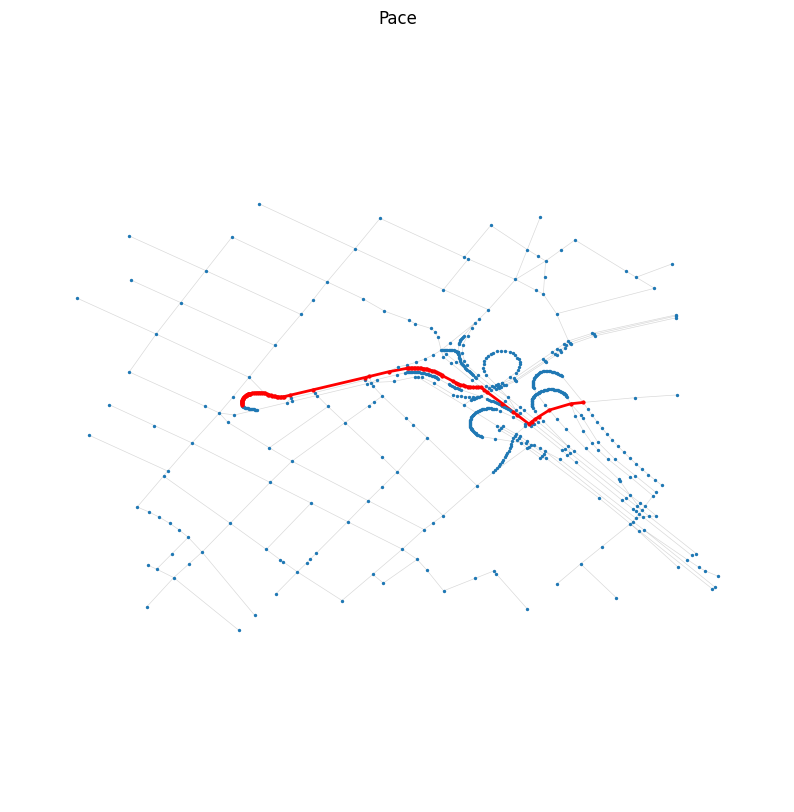

In [5]:
pace_graph = premade_graphs.create_pace_graph()
path = ['Ave Of The Finest / Madison St / Rose St', '2000 Cb Boundary / Brooklyn Bridge Exit Ramp / Fdr Drive Nb En Brooklyn Br', 'Brooklyn Bridge Exit Ramp & Rose St [138]', 'Brooklyn Bridge Exit Ramp & Rose St [79]', 'Brooklyn Brg & Rose St', '2000 Cb Boundary / Brooklyn Brg / Brooklyn Bridge Pedestrian Path [39]', 'Brooklyn Brg / Brooklyn Bridge Entrance Ramp / Rose St [66]', 'Brooklyn Brg & Ct Boundary', 'Brooklyn Brg (midblock) [168]', 'Brooklyn Brg (midblock) [348]', 'Brooklyn Brg & Park Row [69]', 'Brooklyn Brg (midblock) [71]', 'Brooklyn Brg & Park Row [70]', 'Brooklyn Brg & Park Row [201]', 'Brooklyn Brg & Park Row [200]', 'Brooklyn Brg & Park Row [199]', 'Node 198', 'Node 197', 'Node 196', 'Node 195', 'Node 194', 'Node 193', 'Node 192', 'Node 191', 'Park Row (midblock) [190]', 'Park Row (midblock) [472]', 'Park Row (midblock) [471]', 'Park Row (midblock) [470]', 'Park Row (midblock) [469]', 'Nassau Street Line & Park Row [468]', 'Nassau Street Line & Park Row [467]', 'Nassau Street Line & Park Row [466]', 'Nassau Street Line & Park Row [465]', 'Nassau Street Line & Park Row [464]', 'Nassau Street Line & Park Row [463]', 'Nassau Street Line & Park Row [462]', 'Brooklyn Brg & Nassau Street Line [461]', 'Brooklyn Brg & Nassau Street Line [460]', 'Brooklyn Brg & Nassau Street Line [459]', 'Brooklyn Brg & Nassau Street Line [458]', 'Node 457', 'Park Row (midblock) [456]', 'Park Row (midblock) [455]', 'Park Row (midblock) [454]', 'Park Row (midblock) [453]', 'Park Row (midblock) [452]', 'Park Row (midblock) [377]', 'Centre St / Lexington Avenue Line / Park Row', 'Lexington Avenue Line / Park Row / Spruce St', 'Lexington Avenue Line & Park Row [561]', 'Beekman St / Clark Street Line / Lexington Avenue Line', 'Lexington Avenue Line & Park Row [451]', 'Lexington Avenue Line & Park Row [107]', 'Lexington Avenue Line & Park Row [449]', 'Lexington Avenue Line & Park Row [448]', 'Lexington Avenue Line (midblock) [447]', 'Lexington Avenue Line (midblock) [446]', 'Lexington Avenue Line (midblock) [445]', 'Lexington Avenue Line (midblock) [444]', 'Lexington Avenue Line (midblock) [443]', 'Lexington Avenue Line (midblock) [442]', 'Lexington Avenue Line (midblock) [441]', 'Connector & Park Row [440]', 'Connector & Park Row [439]', 'Connector & Park Row [438]', 'Connector & Park Row [437]', 'Connector & Park Row [390]', 'Connector & Park Row [391]', 'Connector & Park Row [392]', 'Connector & Park Row [393]', 'Connector & Park Row [394]', 'Node 395', 'Node 396', 'Node 397', 'Node 398', 'Node 399', 'Node 400', 'Node 401', 'Node 402', 'Node 403', 'Node 404', 'Node 405', 'Node 406', 'Node 407', 'Node 408', 'Node 409', 'Node 410', 'Node 411', 'Node 412', 'Node 413', 'Connector & Lexington Avenue Line [414]', 'Connector & Lexington Avenue Line [415]', 'Connector & Lexington Avenue Line [416]', 'Connector & Lexington Avenue Line [417]', 'Connector & Lexington Avenue Line [418]', 'Connector & Lexington Avenue Line [419]', 'Connector & Lexington Avenue Line [420]']
utils.plot_busy_graph(pace_graph, title="Pace", path=path)

In [6]:
print(pace_graph.nodes()['Ave Of The Finest / Madison St / Rose St'])  # You can see the lat/long of a node
print(list(pace_graph.neighbors('Ave Of The Finest / Madison St / Rose St'))) # Neighbors

{'label': 'Ave Of The Finest / Madison St / Rose St', 'pos': (-74.00245906852791, 40.711570089472225)}
['2000 Cb Boundary / Brooklyn Bridge Exit Ramp / Fdr Drive Nb En Brooklyn Br', 'Node 140', '2000 Cb Boundary / Ave Of The Finest / Brooklyn Bridge Exit Ramp [154]', '2000 Cb Boundary & Madison St']


Note that the x,y are latitude/longitude pairs, so your heuristic should be the "haversine_distance" function in the utils file if you are testing this. I'll talk about this more when I talk about A* in this notebook.

# Game Graphs

Remember that these algorithms can be used on more than just network graphs. Many problems contain states that can transition into other states. An example is the "Sliding Puzzle" game, where you have to get the tiles in the right order, but can only move tiles into the empty one.

![Sliding tile puzzle](https://martingalemeasure.wordpress.com/wp-content/uploads/2014/06/puzzle1.gif?w=660)

See below on how you can create a sliding puzzle in this testing Notebook. Note that it is the same API as the graphs, so you do not need to modify your algorithm.

In [17]:
sliding_puzzle = premade_graphs.create_sliding_tile_graph(3)  # Size (n by n graph)
print("Goal: ", sliding_puzzle.get_goal_state())  # Get the goal based on the size
start = sliding_puzzle.generate_random_start_state()
print("Start:")
print(sliding_puzzle.render_board(start))
print("Neighbors:")
for n in sliding_puzzle.neighbors(start):
    print(sliding_puzzle.render_board(n))
    print("---")

Goal:  ((1, 2, 3), (4, 5, 6), (7, 8, 0))
Start:
1️⃣ 2️⃣ 3️⃣
7️⃣ 4️⃣ 6️⃣
5️⃣ 8️⃣ ⬜
Neighbors:
1️⃣ 2️⃣ 3️⃣
7️⃣ 4️⃣ ⬜
5️⃣ 8️⃣ 6️⃣
---
1️⃣ 2️⃣ 3️⃣
7️⃣ 4️⃣ 6️⃣
5️⃣ ⬜ 8️⃣
---


## Gotcha Graphs

Here are some simple graphs for testing your functions.

This one has a node from start to A with a small cost, but a dead end. 

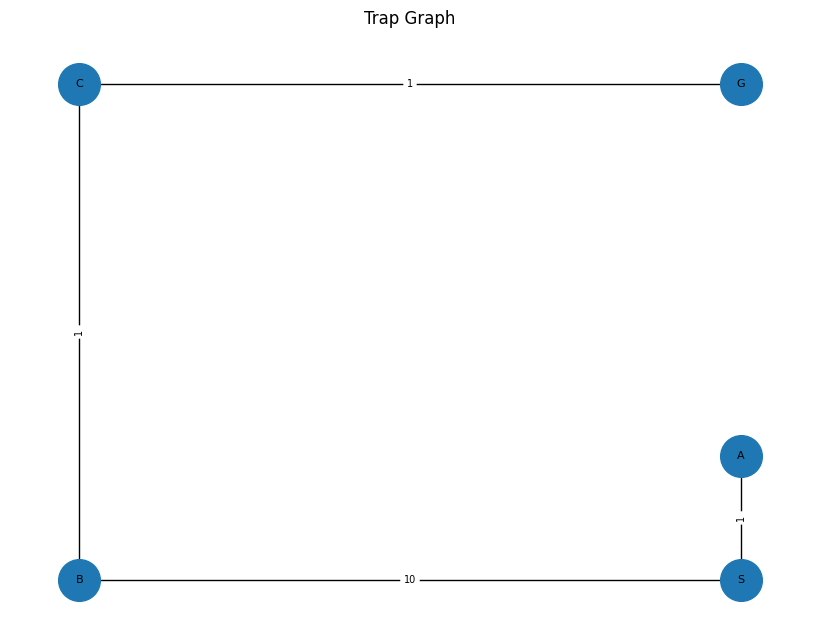

In [18]:
trap_graph = premade_graphs.create_trap_graph()
utils.draw_manhattan_graph(trap_graph, title="Trap Graph")

This one fails if you have an inconsistent heuristic

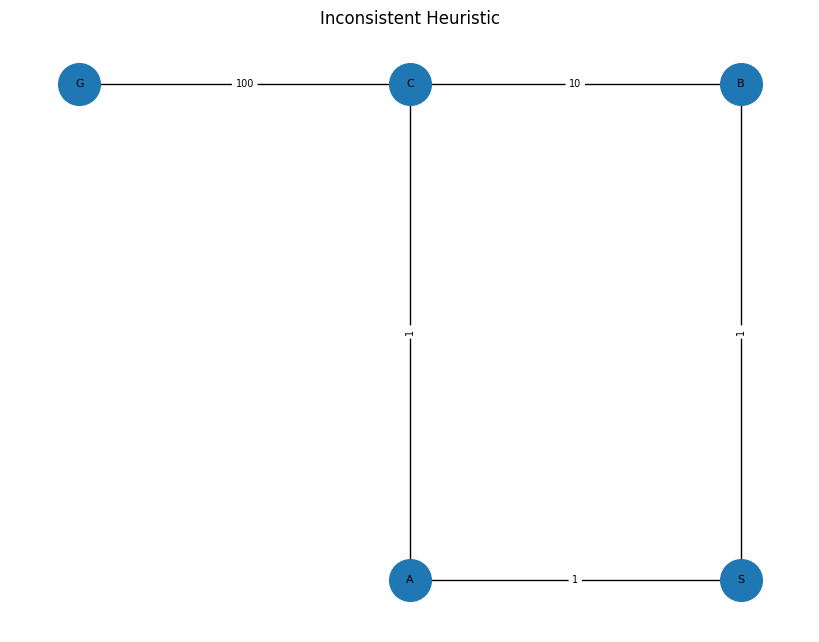

In [19]:
inconsistent_heuristic_trap_graph = premade_graphs.create_inconsistent_heuristic_graph()
utils.draw_manhattan_graph(inconsistent_heuristic_trap_graph, title="Inconsistent Heuristic")

# Testing

Use the space below to test your algorithms. Here are some tests I think should be good to start with.

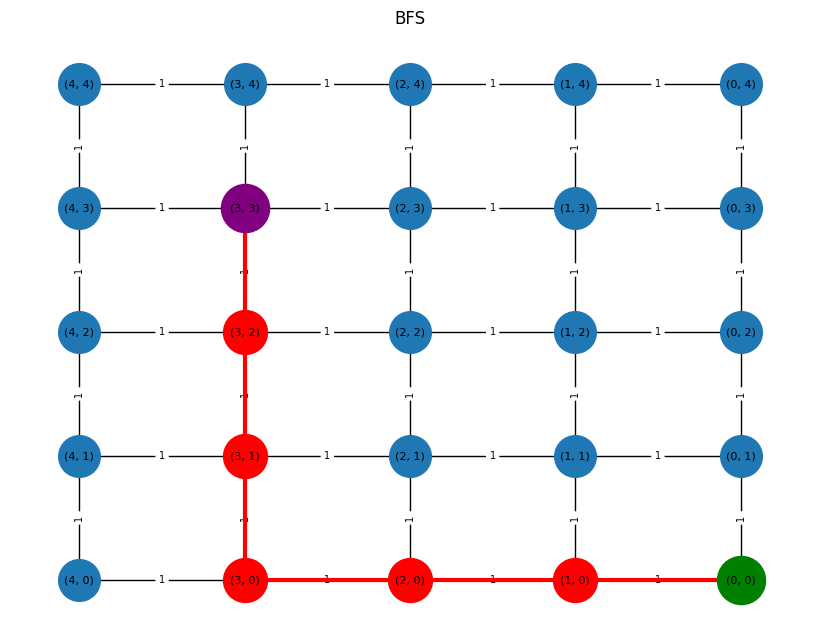

In [23]:
# Test BFS - should be a straight line
grid_graph = premade_graphs.create_grid_graph(5, 5)
path = student_algos.bfs(grid_graph, (0, 0), (3,3))
utils.draw_manhattan_graph(grid_graph, title="BFS", path=path)

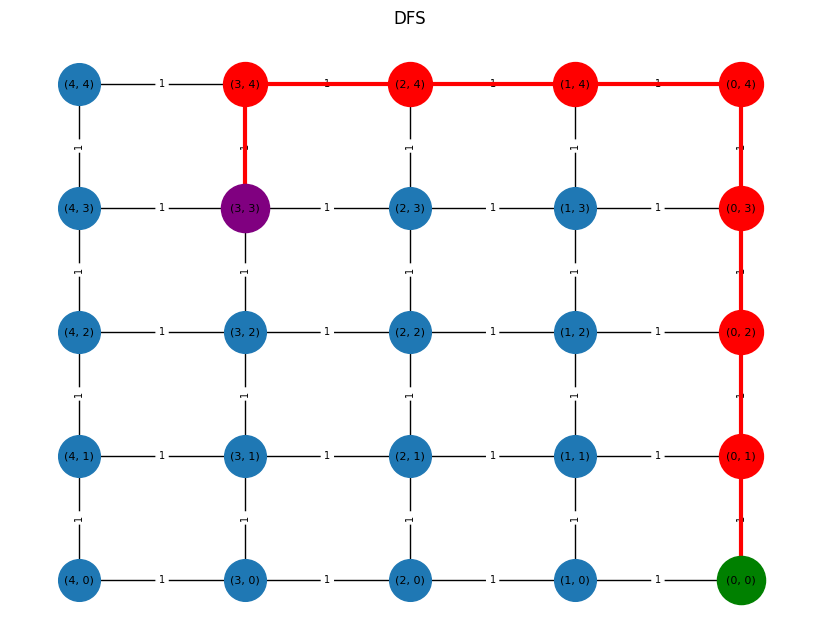

In [24]:
# Test DFS - should be the first path generated when picking the first node in a neighbors list every time
grid_graph = premade_graphs.create_grid_graph(5, 5)
path = student_algos.dfs(grid_graph, (0, 0), (3,3))
utils.draw_manhattan_graph(grid_graph, title="DFS", path=path)

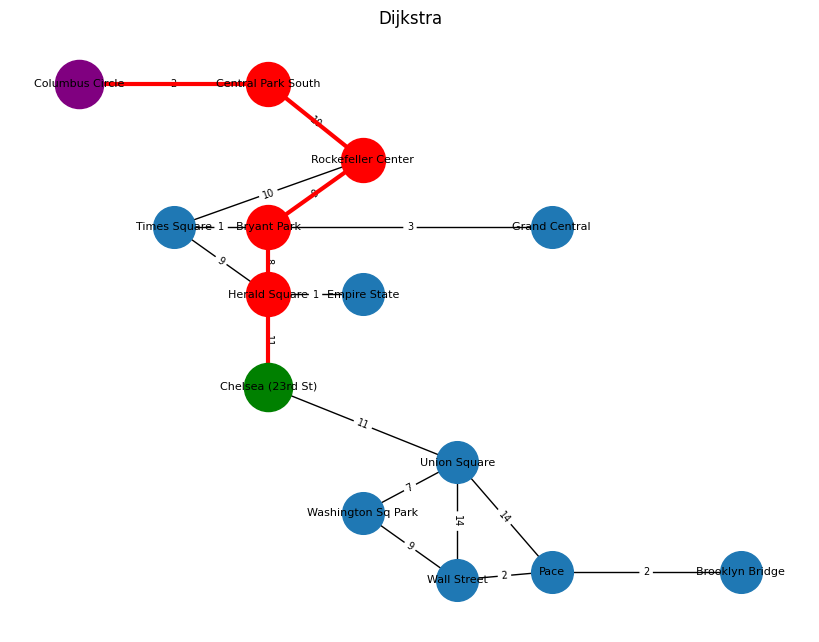

{'total_explorations': 13, 'unique_explored': 13, 'reexpansions': 0, 'goal_expanded': True, 'exploration_order': ['Chelsea (23rd St)', 'Herald Square', 'Union Square', 'Empire State', 'Washington Sq Park', 'Bryant Park', 'Times Square', 'Grand Central', 'Pace', 'Wall Street', 'Brooklyn Bridge', 'Rockefeller Center', 'Central Park South']}


In [31]:
# Test Dijstra - should be the shortest path from Chelsea (23rd St) to Columbus Circle
manhattan_graph = premade_graphs.basic_manhattan()
path = student_algos.dijkstra(manhattan_graph, "Chelsea (23rd St)", "Columbus Circle")
utils.draw_manhattan_graph(manhattan_graph, title="Dijkstra", path=path)
print(manhattan_graph.stats())

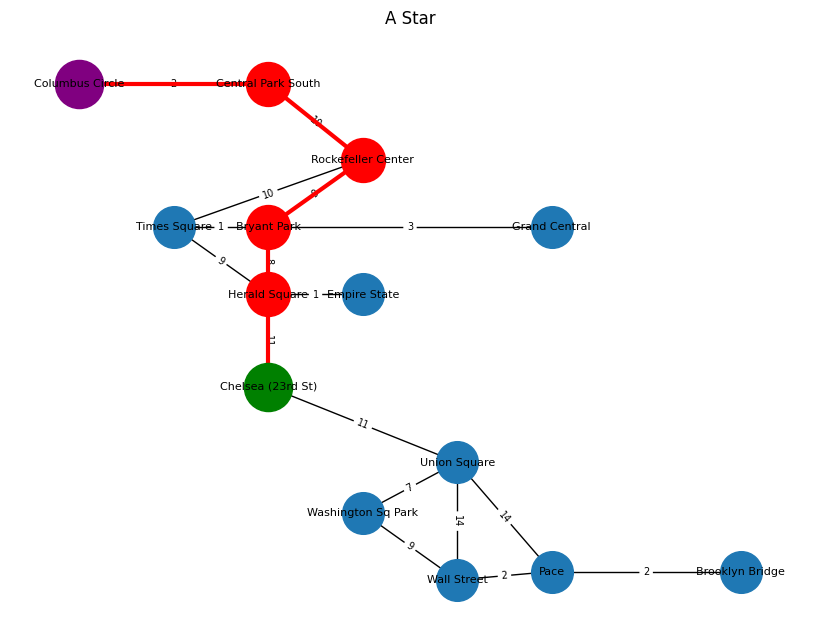

{'total_explorations': 7, 'unique_explored': 7, 'reexpansions': 0, 'goal_expanded': True, 'exploration_order': ['Chelsea (23rd St)', 'Herald Square', 'Times Square', 'Bryant Park', 'Empire State', 'Rockefeller Center', 'Central Park South']}


In [32]:
# Test A Star - should be the shortest path from Pace to Columbus Circle; but explore fewer nodes
# Also test with 0 Heuristic

def manhattan_heuristic(graph, node, goal):
    pos1 = graph.nodes[node]['pos']
    pos2 = graph.nodes[goal]['pos']
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

manhattan_graph = premade_graphs.basic_manhattan()
path = student_algos.a_star(manhattan_graph, "Chelsea (23rd St)", "Columbus Circle", manhattan_heuristic)
utils.draw_manhattan_graph(manhattan_graph, title="A Star", path=path)
print(manhattan_graph.stats())

In [54]:
# Pass in size (n by n graph) - A* with the sliding tile manhattan heuristic should be able to do 8x8 easily
sliding_puzzle = premade_graphs.create_sliding_tile_graph(3)
goal = sliding_puzzle.get_goal_state()
start = sliding_puzzle.generate_random_start_state()

# Try with the misplaced tiles heuristic
path = student_algos.a_star(sliding_puzzle, start, goal, utils.sliding_tile_manhattan_heuristic)
print('Total Explorations: ', sliding_puzzle.stats()['total_explorations'])
print('Path Length: ', len(path))

Total Explorations:  1264
Path Length:  23


In [55]:
# This code will animate the path your code made
from IPython.display import clear_output, display, HTML
import time
MAX_TIME = 10

def display_sliding_tile_path(path):
    for state in path:
        clear_output(wait=True)
        print(sliding_puzzle.render_board(state))
        time.sleep(min(1, MAX_TIME/len(path)))

display_sliding_tile_path(path)

1️⃣ 2️⃣ 3️⃣
4️⃣ 5️⃣ 6️⃣
7️⃣ 8️⃣ ⬜
